# Importy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

___
# Zadanie 1

In [ ]:
mu = 2
sigma = 2
sample_size = 2000
data = np.random.normal(mu, sigma, sample_size)

mediana = np.median(data)
kwartyle = np.percentile(data, [25, 50, 75])
rozstep_miedzykwartylowy = kwartyle[2] - kwartyle[0]
rozstep_proby = np.max(data) - np.min(data)
wariancja = np.var(data, ddof=1)
odchylenie_std = np.std(data, ddof=1)
    
print('Mediana:', mediana)
print('Kwartyle (Q1, Q2, Q3):', kwartyle)
print('Rozstęp międzykwartylowy:', rozstep_miedzykwartylowy)
print('Rozstęp z próby:', rozstep_proby)
print('Wariancja z próby:', wariancja)
print('Odchylenie standardowe:', odchylenie_std)

Mediana: 2.0074494389424364
Kwartyle (Q1, Q2, Q3): [0.61884545 2.00744944 3.35351935]
Rozstęp międzykwartylowy: 2.7346738971421996
Rozstęp z próby: 12.909811487243783
Wariancja z próby: 4.105641616951816
Odchylenie standardowe: 2.0262382922429967


In [ ]:
dane = np.random.normal(2,2,2000)

def mediana(dane):
    dane = sorted(dane)
    n = len(dane)
    if n % 2 != 0:
        return dane[n//2]
    else: 
        return (dane[n//2] + dane[n//2])/2

def kwartyle(dane):
    dane = sorted(dane)
    Q2 = mediana(dane)
    indeks = dane.index(Q2)
    dane_mniejsze = dane[0:indeks]
    Q1 = mediana(dane_mniejsze)
    dane_wieksze = dane[indeks:]
    Q3 = mediana(dane_wieksze)
    return [Q1,Q2,Q3]

rozstep_miedzykwartylowy =  kwartyle(dane)[2] - kwartyle(dane)[0]
rozstep_proby = np.max(dane) - np.min(dane)

def wariancja(dane):
    n = len(dane)
    srednia = sum(dane)/n
    suma = 0
    for i in dane:
        suma += (i - srednia)**2
    return suma/(n-1)

med = mediana(dane)
kwar = kwartyle(dane)
war = wariancja(dane)

rozstep_miedzykwartylowy =  kwar[2] - kwar[0]
rozstep_proby = np.max(dane) - np.min(dane)
odchylenie_std = np.power(war,1/2)
print('Mediana:', med)
print('Kwartyle (Q1, Q2, Q3):', kwar)
print('Rozstęp międzykwartylowy:', rozstep_miedzykwartylowy)
print('Rozstęp z próby:', rozstep_proby)
print('Wariancja z próby:', war)
print('Odchylenie standardowe:', odchylenie_std)

Mediana: 2.0371530823798456
Kwartyle (Q1, Q2, Q3): [0.6694104118619257, 2.0371530823798456, 3.394924742241968]
Rozstęp międzykwartylowy: 2.725514330380042
Rozstęp z próby: 13.923237692882582
Wariancja z próby: 4.064449249557448
Odchylenie standardowe: 2.0160479283879758


___
# Zadanie 2

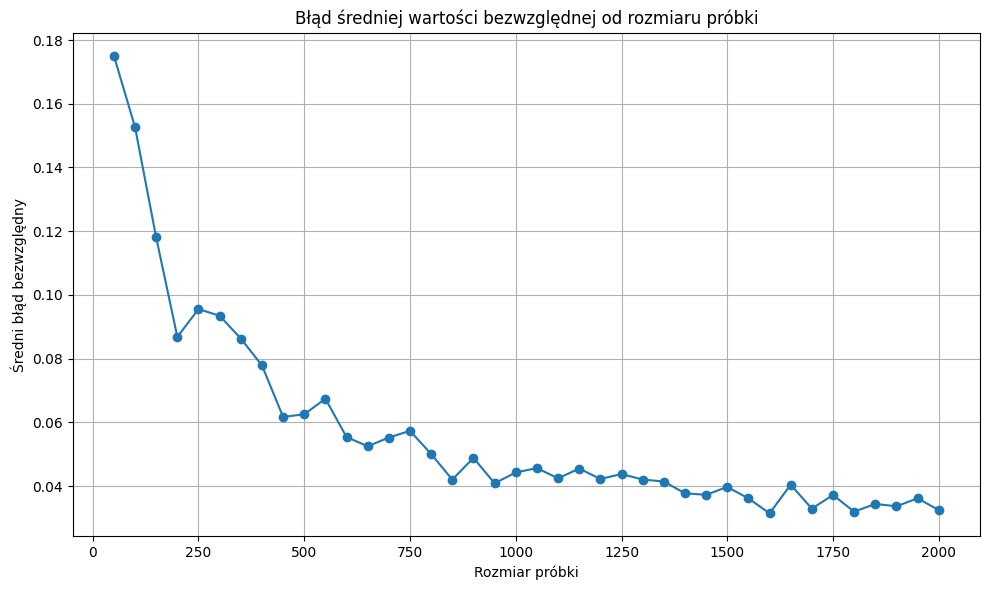

In [3]:
N = np.arange(50,2050,50)
mu = 2
sigma = 3
teo = np.sqrt(2/np.pi)*sigma

diff = []
for n in N:
    roznice = []
    for i in range(100):
        X = np.random.normal(mu,sigma,n)
        emp = np.mean(np.abs(X - mu))
        roznica = np.abs(emp - teo)
        roznice.append(roznica)
    diffrence = np.mean(roznice)
    diff.append(diffrence)

plt.figure(figsize=(10,6))
plt.plot(N,diff, marker='o')
plt.xlabel('Rozmiar próbki')
plt.ylabel('Średni błąd bezwzględny')
plt.title('Błąd średniej wartości bezwzględnej od rozmiaru próbki')
plt.grid(True)
plt.tight_layout()
plt.show()

___
# Zadanie 3

19.589828946471997
15.737796215889766
inf


c:\Users\TOMAHAWK\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


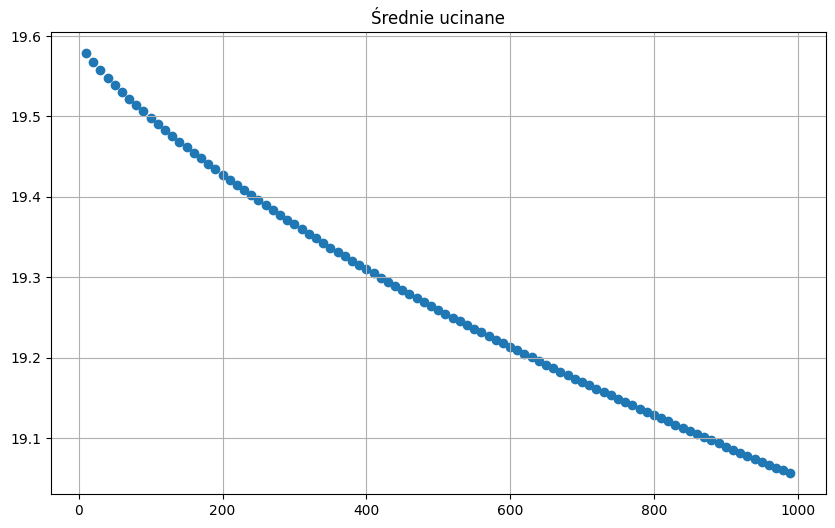

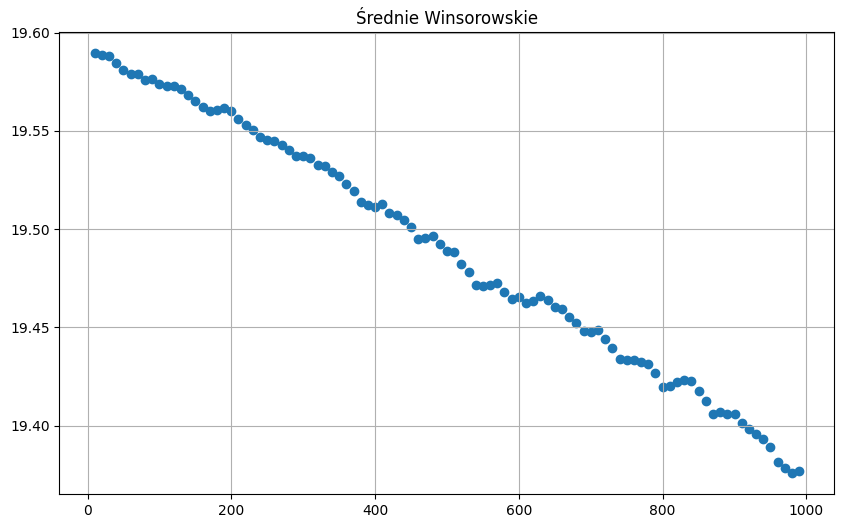

In [5]:
earnings = pd.read_csv('CPSSW3.csv').iloc[:, 3].astype(float).tolist()

def arytmetycna(dane):
    return sum(dane)/len(dane)

def harmoniczna(dane):
    return len(dane)/sum(1/i for i in dane)

def geometryczna(dane):
    return np.power(np.prod(dane), 1/len(dane))

def ucinana(dane,k):
    dane = sorted(dane)
    return sum(dane[k:-k]) / (len(dane) - 2*k)

def winsorowska(dane,k):
    dane = sorted(dane)
    n = len(dane)
    srodek = dane[k:n-k]
    return (k*dane[k] + sum(srodek) + k*dane[n-k-1]) / n

print(arytmetycna(earnings))
print(harmoniczna(earnings))
print(geometryczna(earnings))

k_values = np.arange(10, 1000, 10)
srednie_ucinane = [ucinana(earnings, k) for k in k_values]
srednie_winsorowskie = [winsorowska(earnings, k) for k in k_values]

plt.figure(figsize=(10,6))
plt.scatter(k_values, srednie_ucinane)
plt.title('Średnie ucinane')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(k_values, srednie_winsorowskie)
plt.title('Średnie Winsorowskie')
plt.grid(True)
plt.show()

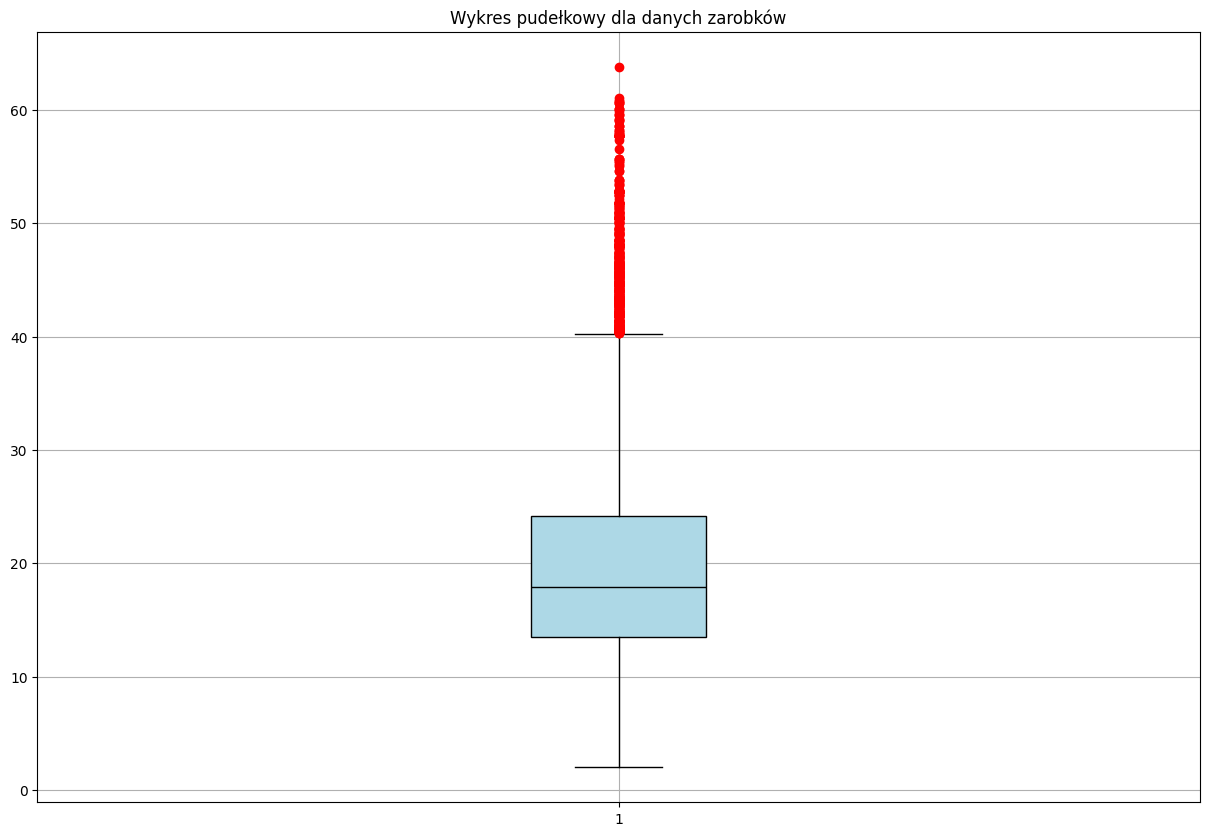

In [ ]:
plt.figure(figsize=(15,10))
plt.boxplot(earnings, 
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor='red'))

plt.title('Wykres pudełkowy dla danych zarobków')
plt.grid(True)
plt.show()